**Importing required libraries for the project**

In [1]:
import tensorflow as tf
import cv2
import numpy as np
import pandas as pd
import os
import mediapipe as mp
from matplotlib import pyplot as plt
import time

***Access the Webcam via computer vision (cv2) and drawing landmarks with mediapipe***

In [2]:
mp_holistic = mp.solutions.holistic #Holistic functionality
mp_drawing = mp.solutions.drawing_utils #Drawing utilities

In [3]:
def mp_detection(img, model):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   #color converts from BGR to RGB
    img.flags.writeable=False                     #Image will not be writable now
    result = model.process(img)                  #Process image and predict
    img.flags.writeable=True                      #Image will be writable now
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)   #color converts from RGB to BGR
    return img, result

In [4]:
def draw_landmark(img, result):
    mp_drawing.draw_landmarks(img, result.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(img, result.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(img, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(img, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [5]:
def draw_style_landmark(img, result):
    mp_drawing.draw_landmarks(img, result.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    mp_drawing.draw_landmarks(img, result.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    mp_drawing.draw_landmarks(img, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    mp_drawing.draw_landmarks(img, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))

In [6]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [7]:
capt = cv2.VideoCapture(1)
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic: 
    while capt.isOpened():
        #Reading the feed
        ret, frm = capt.read()
    
        #detection of various features on cam
        img, result = mp_detection(frm, holistic)
        print(result)

        #drawing landmarks in real time
        draw_style_landmark(img, result)
        
        #Showing off at screen
        cv2.imshow('Cam Feed', img)
        #Breaking the loop and turning camera 'off'
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    capt.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
draw_style_landmark(frm, result)

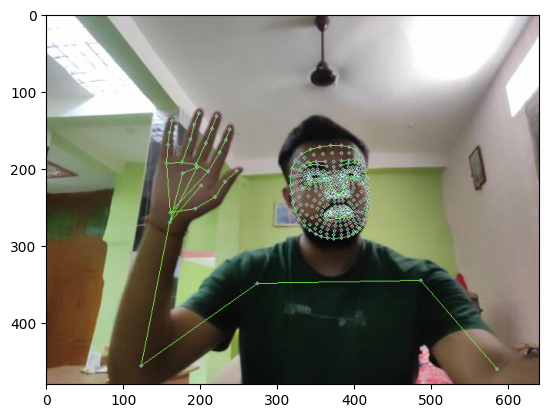

In [9]:
plt.imshow(cv2.cvtColor(frm, cv2.COLOR_BGR2RGB))

**Key point Extraction**

In [10]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in result.pose_landmarks.landmark]).flatten() if result.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in result.face_landmarks.landmark]).flatten() if result.face_landmarks else np.zeros(468*3)
l_hand = np.array([[res.x, res.y, res.z] for res in result.left_hand_landmarks.landmark]).flatten() if result.left_hand_landmarks else np.zeros(21*3)
r_hand = np.array([[res.x, res.y, res.z] for res in result.right_hand_landmarks.landmark]).flatten() if result.right_hand_landmarks else np.zeros(21*3)

In [11]:
face

array([ 0.595523  ,  0.52021337, -0.02514415, ...,  0.63317454,
        0.42804593,  0.02532068])

In [12]:
l_hand

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
r_hand

array([ 2.52700925e-01,  5.35793245e-01,  2.88642156e-07,  3.02562624e-01,
        5.25349081e-01, -1.77134592e-02,  3.42654198e-01,  4.95045632e-01,
       -2.38854699e-02,  3.63819599e-01,  4.53626513e-01, -2.89346352e-02,
        3.85940313e-01,  4.23334748e-01, -3.40713635e-02,  3.29388440e-01,
        4.25391674e-01, -1.00295590e-02,  3.52428526e-01,  3.74375910e-01,
       -2.16029417e-02,  3.64218295e-01,  3.40686232e-01, -3.13796625e-02,
        3.73318106e-01,  3.10809076e-01, -3.85017730e-02,  3.04159909e-01,
        4.07353461e-01, -1.00388937e-02,  3.24453324e-01,  3.48516166e-01,
       -2.08841078e-02,  3.36389065e-01,  3.09845477e-01, -3.12573947e-02,
        3.46560478e-01,  2.77043223e-01, -3.86256762e-02,  2.76088744e-01,
        4.00304019e-01, -1.27094565e-02,  2.92309940e-01,  3.38392735e-01,
       -2.54420210e-02,  3.01516563e-01,  2.99299777e-01, -3.49150263e-02,
        3.10758621e-01,  2.67852545e-01, -4.08117622e-02,  2.44883358e-01,
        4.02392745e-01, -

In [14]:
pose

array([ 5.95880568e-01,  4.93963391e-01, -6.65989339e-01,  9.99966204e-01,
        6.13925874e-01,  4.44310308e-01, -6.17689967e-01,  9.99904215e-01,
        6.26771688e-01,  4.44468707e-01, -6.17450297e-01,  9.99879122e-01,
        6.35842025e-01,  4.45004791e-01, -6.17559552e-01,  9.99888301e-01,
        5.70726752e-01,  4.49337929e-01, -6.14365041e-01,  9.99932051e-01,
        5.53314030e-01,  4.53634679e-01, -6.14234924e-01,  9.99933779e-01,
        5.37409425e-01,  4.57655042e-01, -6.14370108e-01,  9.99954820e-01,
        6.48149610e-01,  4.62778568e-01, -3.01835030e-01,  9.99878228e-01,
        5.19009948e-01,  4.73313540e-01, -2.77955562e-01,  9.99963999e-01,
        6.22355819e-01,  5.47316670e-01, -5.54517150e-01,  9.99949157e-01,
        5.68880320e-01,  5.57458878e-01, -5.47956407e-01,  9.99976337e-01,
        7.60102391e-01,  7.19068170e-01, -9.60271508e-02,  9.99793947e-01,
        4.28700596e-01,  7.28281379e-01, -1.53054506e-01,  9.99936998e-01,
        9.14132476e-01,  

In [18]:
def keypoint_extraction(result):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in result.pose_landmarks.landmark]).flatten() if result.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in result.face_landmarks.landmark]).flatten() if result.face_landmarks else np.zeros(468*3)
    l_hand = np.array([[res.x, res.y, res.z] for res in result.left_hand_landmarks.landmark]).flatten() if result.left_hand_landmarks else np.zeros(21*3)
    r_hand = np.array([[res.x, res.y, res.z] for res in result.right_hand_landmarks.landmark]).flatten() if result.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, l_hand, r_hand])

In [19]:
result_test = keypoint_extraction(result)

In [20]:
np.save('0', result_test)

In [21]:
np.load('0.npy')

array([ 0.59588057,  0.49396339, -0.66598934, ...,  0.25484976,
        0.2893849 , -0.04087954])

**Setting up root folders for this project**

In [26]:
#path for data exported ie numpy arrays
data_path = os.path.join('mp_data')

In [27]:
#Actions to detect
actions = np.array(['hello', 'thank you', 'sorry', 'iloveyou'])

#thirty videos as data
no_vid=30

#thirty frames as total length of videos
seq_len=30

In [28]:
for action in actions:
    for seq in range(seq_len):
        try:
            os.makedirs(os.path.join(data_path, action, str(seq)))
        except:
            pass

**Collecting training and testing data**

In [29]:
capt = cv2.VideoCapture(1)
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic: 

    #loop through actions
    for action in actions:
        #loop through seq/videos
        for vid in range(no_vid):
            #loop through sequence length
            for frame in range(seq_len):
                
                #Reading the feed
                ret, frm = capt.read()
            
                #detection of various features on cam
                img, result = mp_detection(frm, holistic)
                print(result)
        
                #drawing landmarks in real time
                draw_style_landmark(img, result)

                #applying waiting logic
                if frame == 0:
                    cv2.putText(img,'Starting Collection',(120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(img,'Collecting frames for {} video number {}'.format(action,vid),(15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.waitKey(1200)
                else:
                    cv2.putText(img,'Collecting frames for {} video number {}'.format(action,vid),(15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)

                # exporting keypoints
                keypoints = keypoint_extraction(result)
                npy_path = os.path.join(data_path, action, str(vid), str(frame))
                np.save(npy_path, keypoints)
                
                #Showing off at screen
                cv2.imshow('Cam Feed', img)
                
                #Breaking the loop and turning camera 'off'
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    capt.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

**Data preprocessing and creating labels and features**

In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [31]:
map_label = {label:num for num, label in enumerate(actions)}

In [32]:
map_label

{'hello': 0, 'thank you': 1, 'sorry': 2, 'iloveyou': 3}

In [33]:
sequences, labels = [], []
for action in actions:
    for vid in range(no_vid):
        window=[]
        for frame in range(seq_len):
            res = np.load(os.path.join(data_path,action, str(vid), "{}.npy".format(frame)))
            window.append(res)
        sequences.append(window)
        labels.append(map_label[action])

In [34]:
np.array(sequences).shape

(120, 30, 1662)

In [35]:
np.array(labels).shape

(120,)

In [36]:
X = np.array(sequences)

In [37]:
y = to_categorical(labels).astype(int)

In [38]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1,

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [84]:
X_test.shape

(12, 30, 1662)

**Building the LSTM model**

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [86]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [87]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [88]:
[actions.shape[0]]

[4]

In [89]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [90]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
4/4 [==============================] - 8s 258ms/step - loss: 4.3072 - categorical_accuracy: 0.3241
Epoch 2/2000
4/4 [==============================] - 1s 233ms/step - loss: 3.1938 - categorical_accuracy: 0.2685
Epoch 3/2000
4/4 [==============================] - 1s 251ms/step - loss: 1.4225 - categorical_accuracy: 0.3241
Epoch 4/2000
4/4 [==============================] - 1s 239ms/step - loss: 1.4009 - categorical_accuracy: 0.2222
Epoch 5/2000
4/4 [==============================] - 1s 224ms/step - loss: 1.3576 - categorical_accuracy: 0.2315
Epoch 6/2000
4/4 [==============================] - 1s 229ms/step - loss: 1.3452 - categorical_accuracy: 0.4815
Epoch 7/2000
4/4 [==============================] - 1s 229ms/step - loss: 1.2930 - categorical_accuracy: 0.3241
Epoch 8/2000
4/4 [==============================] - 1s 226ms/step - loss: 1.2427 - categorical_accuracy: 0.4167
Epoch 9/2000
4/4 [==============================] - 1s 231ms/step - loss: 1.1663 - categorical_accuracy:

In [91]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 4)                 132       
                                                                 
Total params: 596708 (2.28 MB)
Trainable params: 59670

**Make predictions**

In [92]:
res = model.predict(X_test)

1/1 [==============================] - 1s 874ms/step


In [95]:
actions[np.argmax(res[1])]

'iloveyou'

In [96]:
actions[np.argmax(y_test[1])]

'iloveyou'

**Saving the weights**

In [119]:
model.save('sign.h5')

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.load_weights('sign.h5')

**Evaluation using confusion matrix**

In [98]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [99]:
yh = model.predict(X_test)

1/1 [==============================] - 0s 196ms/step


In [100]:
yt = np.argmax(y_test, axis=1).tolist()
yh = np.argmax(yh, axis=1).tolist()

In [101]:
multilabel_confusion_matrix(yt ,yh)

array([[[ 8,  1],
        [ 0,  3]],

       [[ 7,  0],
        [ 1,  4]],

       [[ 9,  1],
        [ 0,  2]],

       [[10,  0],
        [ 1,  1]]], dtype=int64)

In [102]:
accuracy_score(yt ,yh)

0.8333333333333334

**Test in real time**

In [114]:
colors = [(245,117,16), (117,245,16), (16,117,245), (245, 16, 117)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0,85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255),2, cv2.LINE_AA)
    return output_frame

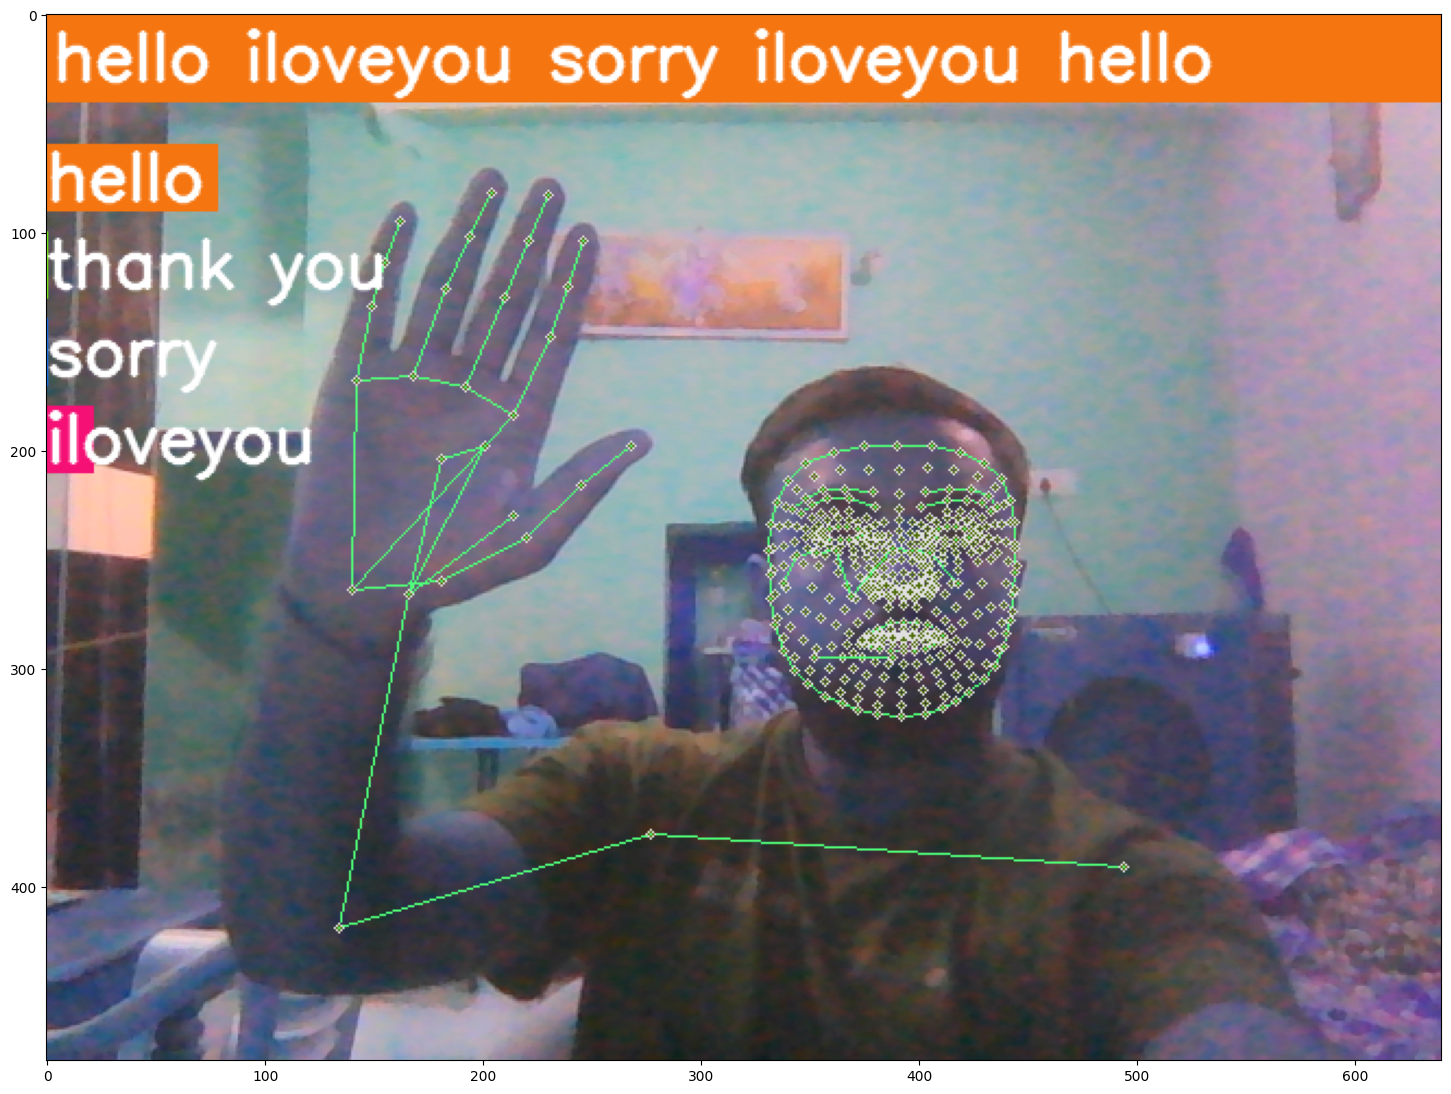

In [117]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, img, colors))

In [125]:
#detection variables
sequence = []
sentc = []
prediction=[]
threshold = 0.7


capt = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic: 
    while capt.isOpened():
        #Reading the feed
        ret, frm = capt.read()
    
        #detection of various features on cam
        img, result = mp_detection(frm, holistic)
        print(result)

        #drawing landmarks in real time
        draw_style_landmark(img, result)

        #prediction logic 2
        keypoints = keypoint_extraction(result)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence,axis=0))[0]
            print(actions[np.argmax(res)])
            prediction.append(np.argmax(res))

            # Visualization logic
            if np.unique(prediction[-10:])[0]==np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentc)>0:
                        if actions[np.argmax(res)] != sentc[-1]:
                            sentc.append(actions[np.argmax(res)])
                    else:
                        sentc.append(actions[np.argmax(res)])
    
            if len(sentc) > 5:
                sentc = sentc[-5:]
    
            # viz probablity
            img = prob_viz(res, actions, img, colors)
        

        cv2.rectangle(img, (0,0), (640,40), (245,117,16), -1)
        cv2.putText(img, ' '.join(sentc), (3,30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        #Showing off at screen
        cv2.imshow('Cam Feed', img)
        
        #Breaking the loop and turning camera 'off'
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    capt.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [126]:
capt.release()
cv2.destroyAllWindows()